<a href="https://colab.research.google.com/github/neeklesh/Complete-Python-3-Bootcamp/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
data = pd.read_csv('/content/employees.csv')

In [44]:
data.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [45]:
data = data.rename({'Last Login Time':'Time_logged_in'}, axis=1)
data

,First Name,Gender,Start Date,Time_logged_in,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [46]:
data.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Time_logged_in     1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [47]:
data['Start Date'] = pd.to_datetime(data['Start Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First Name         933 non-null    object        
 1   Gender             855 non-null    object        
 2   Start Date         1000 non-null   datetime64[ns]
 3   Time_logged_in     1000 non-null   object        
 4   Salary             1000 non-null   int64         
 5   Bonus %            1000 non-null   float64       
 6   Senior Management  933 non-null    object        
 7   Team               957 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 62.6+ KB


In [48]:
data['Time_logged_in'] = pd.to_datetime(data['Time_logged_in'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First Name         933 non-null    object        
 1   Gender             855 non-null    object        
 2   Start Date         1000 non-null   datetime64[ns]
 3   Time_logged_in     1000 non-null   datetime64[ns]
 4   Salary             1000 non-null   int64         
 5   Bonus %            1000 non-null   float64       
 6   Senior Management  933 non-null    object        
 7   Team               957 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 62.6+ KB


In [49]:
data.nunique()

First Name           200
Gender                 2
Start Date           972
Time_logged_in       720
Salary               995
Bonus %              971
Senior Management      2
Team                  10
dtype: int64

In [50]:
data.isnull().sum()

First Name            67
Gender               145
Start Date             0
Time_logged_in         0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [51]:
# Replace null values in 'first_name' based on the 'manager' column
data['First Name'].fillna(value='No_Name', inplace=True)  # Fill with 'Non_Manager' by default
data['First Name']

0      Douglas
1       Thomas
2        Maria
3        Jerry
4        Larry
        ...   
995      Henry
996    Phillip
997    Russell
998      Larry
999     Albert
Name: First Name, Length: 1000, dtype: object

In [52]:
data['Gender'].fillna('No gender', inplace = True)

In [53]:
mode = data['Senior Management'].mode().values[0]
mode

True

In [109]:
data1 = data

In [54]:
data['Senior Management'] = data['Senior Management'].replace(np.nan, mode)

In [58]:
data.isna().sum()

First Name           0
Gender               0
Start Date           0
Time_logged_in       0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64

In [57]:
data.dropna(subset=['Team'], inplace=True)

In [59]:
data.shape

(957, 8)

In [82]:
#Visulatisation

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Salary', ylabel='count'>

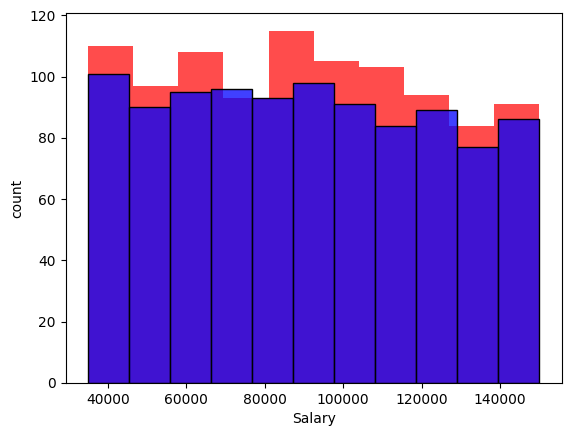

In [27]:
#Univariate Analysis
plt.hist(data['Salary'], color= 'Red', alpha = 0.7)
plt.xlabel('Salary')
plt.ylabel('count')

sns.histplot(data['Salary'], color = 'Blue')

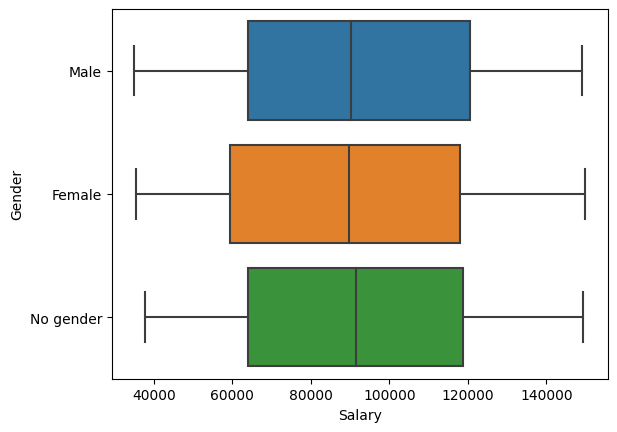

In [93]:
#boxplot and Bivariate analysis
sns.boxplot(x = 'Salary', y = 'Gender', data = data)
plt.show()

<Axes: xlabel='Bonus %', ylabel='Gender'>

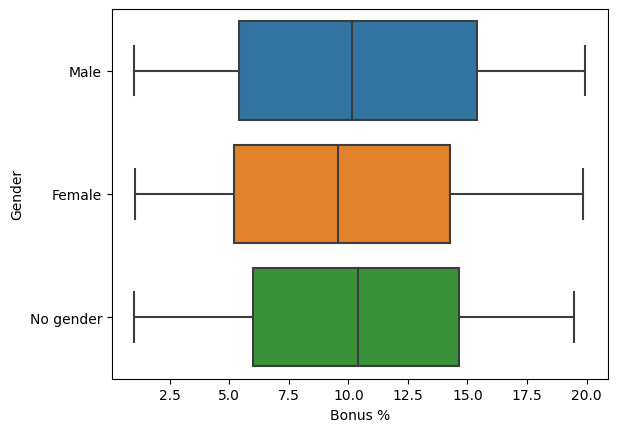

In [98]:
sns.boxplot(x = 'Bonus %', y = 'Gender', data = data)

<Axes: xlabel='Team', ylabel='Salary'>

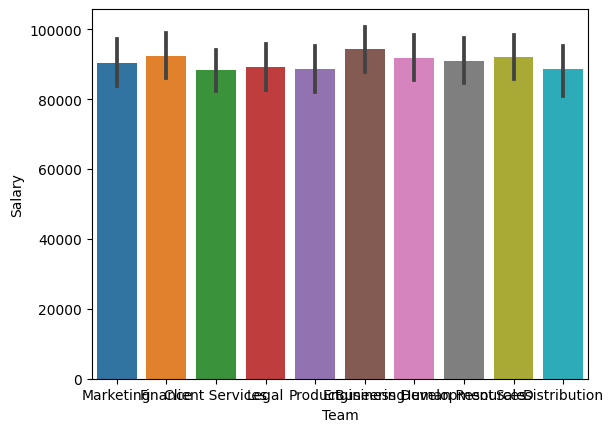

In [60]:

sns.barplot(x = 'Team', y = 'Salary', data = data)

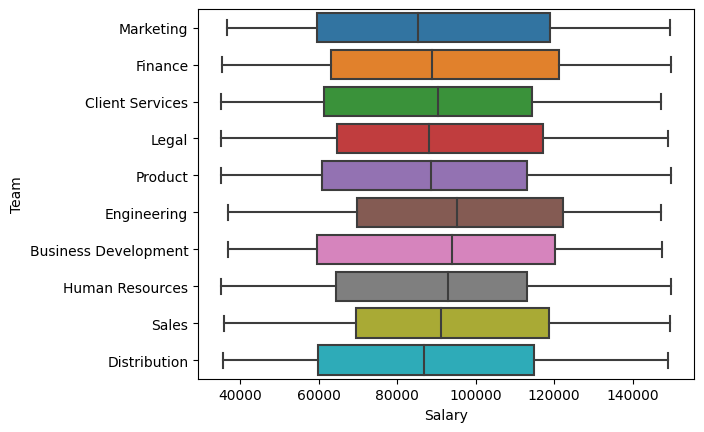

In [61]:
111#boxplot and Bivariate analysis
sns.boxplot(x = 'Salary', y = 'Team', data = data)
plt.show()

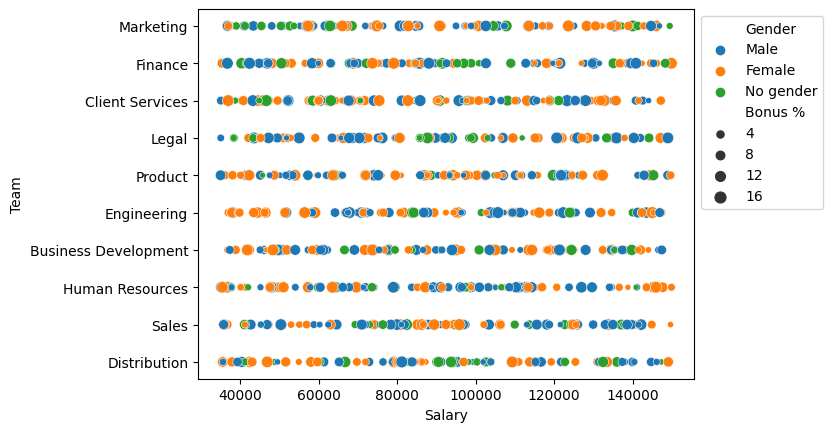

In [63]:
sns.scatterplot( x="Salary", y='Team', data=data,
                hue='Gender', size='Bonus %')

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

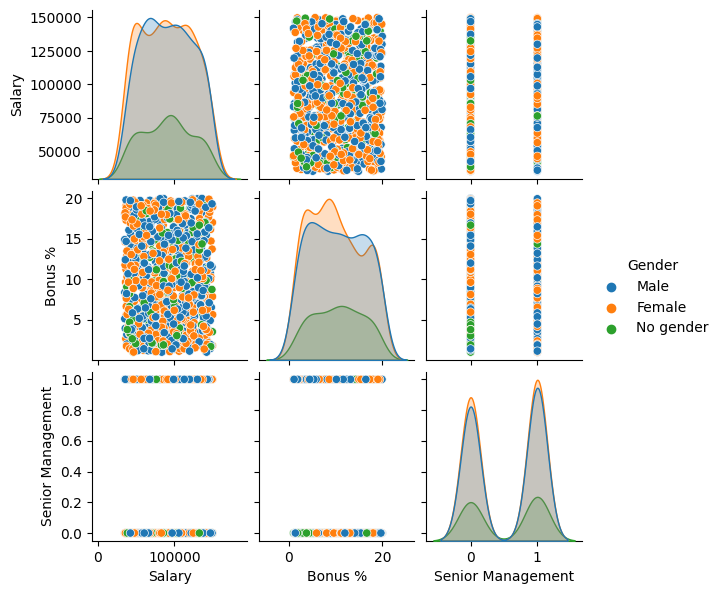

In [66]:

# Multivariate analysis
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(data, hue='Gender', height=2)

<Axes: >

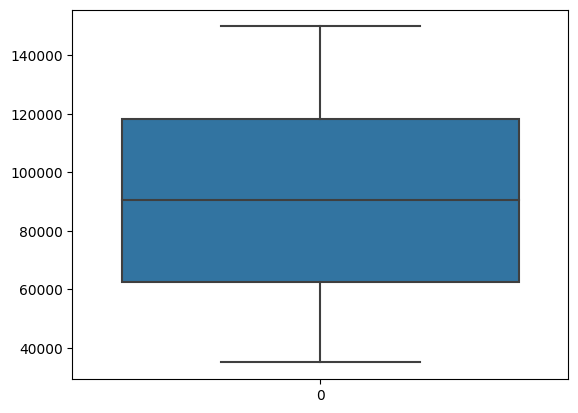

In [68]:
sns.boxplot(data['Salary'])

New Shape:  (957, 8)


<Axes: xlabel='Salary'>

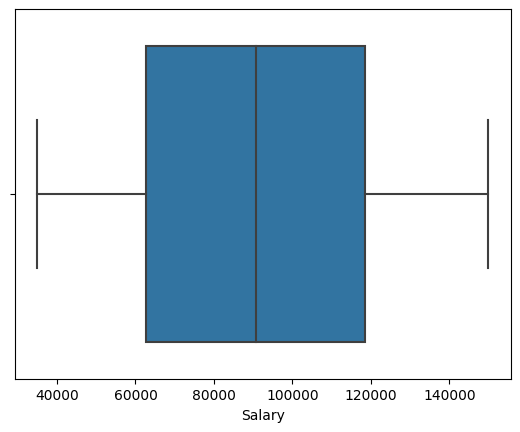

In [71]:
# IQR
# Calculate the upper and lower limits
Q1 = data['Salary'].quantile(0.25)
Q3 = data['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(data['Salary']>=upper)[0]
lower_array = np.where(data['Salary']<=lower)[0]

# Removing the outliers
data.drop(index=upper_array, inplace=True)
data.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", data.shape)
sns.boxplot(x='Salary', data=data)